<a href="https://colab.research.google.com/github/DeisyData/Portafolio/blob/main/API_Integration/Conversational_BOT/Telegram_RandonForest-Model-pkl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import joblib
import pandas as pd

# Nuevos datos para predicción
new_data = pd.DataFrame({
    'Age': [25],
    'Weight': [70],
    'Smoker': [1]
})

rf_loaded = joblib.load('random_forest_model.pkl')

# Hacer predicciones con el modelo cargado
predictions = rf_loaded.predict(new_data)

# Mostrar resultados
print("Predicciones:", predictions)

Predicciones: [0]


# Ejemplo de Bot

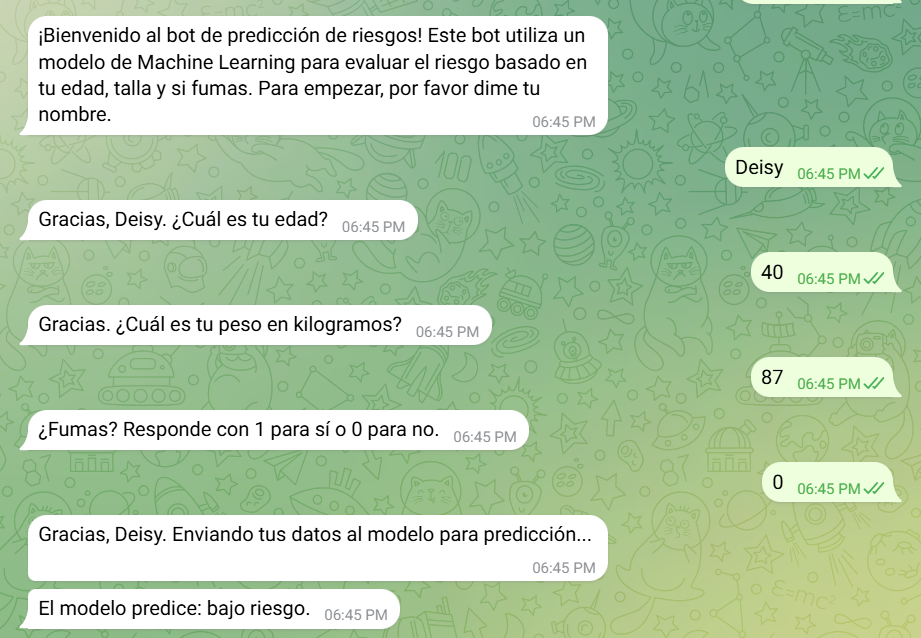

In [ ]:
import requests
import time
import json
import joblib
import pandas as pd
from openai import OpenAI

# Token Telegram
TOKEN = "aqui tu token de telegram"

# Cargar el modelo previamente entrenado
rf_loaded = joblib.load('random_forest_model.pkl')

def get_updates(offset):
    url = f"https://api.telegram.org/bot{TOKEN}/getUpdates"
    params = {"timeout": 100, "offset": offset}
    response = requests.get(url, params=params)
    return response.json()["result"]

def send_message(chat_id, text):
    url = f"https://api.telegram.org/bot{TOKEN}/sendMessage"
    params = {"chat_id": chat_id, "text": text}
    requests.post(url, params=params)

def predict_with_model(data):
    # Convertir los datos a un DataFrame
    df = pd.DataFrame([data])
    # Realizar la predicción
    prediction = rf_loaded.predict(df)
    return prediction[0]

def main():
    print("Iniciando BOT Telegram-Machine Learning")
    offset = 0
    user_data = {}

    while True:
        updates = get_updates(offset)
        if updates:
            for update in updates:
                offset = update["update_id"] + 1
                chat_id = update["message"]["chat"]["id"]
                user_message = update["message"]["text"].strip().lower()

                if chat_id not in user_data:
                    user_data[chat_id] = {"step": 0, "name": None, "age": None, "Weight": None, "smoker": None}

                step = user_data[chat_id]["step"]

                if step == 0:
                    send_message(chat_id, "¡Bienvenido al bot de predicción de riesgos cardiovascular! Este bot utiliza un modelo de Machine Learning para evaluar el riesgo basado en tu edad, talla y si fumas. Para empezar, por favor dime tu nombre.")
                    user_data[chat_id]["step"] = 1
                elif step == 1:
                    user_data[chat_id]["name"] = user_message.capitalize()
                    send_message(chat_id, f"Ahora {user_data[chat_id]['name']}. ¿Cuál es tu edad?")
                    user_data[chat_id]["step"] = 2
                elif step == 2:
                    if user_message.isdigit():
                        user_data[chat_id]["age"] = int(user_message)
                        send_message(chat_id, f"{user_data[chat_id]['name']}  dime ¿Cuál es tu peso en kilogramos?")
                        user_data[chat_id]["step"] = 3
                    else:
                        send_message(chat_id, f"{user_data[chat_id]['name']}  ingresa un número válido para tu edad.")
                elif step == 3:
                    if user_message.isdigit():
                        user_data[chat_id]["Weight"] = int(user_message)
                        send_message(chat_id, "¿Fumas? Responde con 1 para sí o 0 para no.")
                        user_data[chat_id]["step"] = 4
                    else:
                        send_message(chat_id, "Por favor, ingresa un número válido para tu talla.")
                elif step == 4:
                    if user_message in ["1", "0"]:
                        user_data[chat_id]["smoker"] = int(user_message)

                        # Preparar los datos para la predicción
                        prediction_data = {
                            "Age": user_data[chat_id]["age"],
                            "Weight": user_data[chat_id]["Weight"],
                            "Smoker": user_data[chat_id]["smoker"]
                        }

                        send_message(chat_id, f"Gracias, {user_data[chat_id]['name']}. Enviando tus datos al modelo para predicción...")
                        prediction = predict_with_model(prediction_data)

                        risk = "alto riesgo" if prediction == 1 else "bajo riesgo"
                        send_message(chat_id, f"Tiene  {risk} cardiovascular")

                        user_data[chat_id] = {"step": 0, "name": None, "age": None, "Weight": None, "smoker": None}
                    else:
                        send_message(chat_id, "Por favor, responde con 1 para sí o 0 para no.")
        else:
            time.sleep(1)

if __name__ == '__main__':
    main()


Iniciando BOT Telegram-Machine Learning


KeyboardInterrupt: 